In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('clv_data.csv')

In [3]:
df.head()

,Unnamed: 0,id,age,gender,income,days_on_platform,city,purchases
0,0,0,NaN,Male,126895,14.0,San Francisco,0
1,1,1,NaN,Male,161474,14.0,Tokyo,0
2,2,2,24.0,Male,104723,34.0,London,1
3,3,3,29.0,Male,43791,28.0,London,2
4,4,4,18.0,Female,132181,26.0,London,2


### Understanding Data

In [4]:
df.shape

(5000, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5000 non-null   int64  
 1   id                5000 non-null   int64  
 2   age               2554 non-null   float64
 3   gender            5000 non-null   object 
 4   income            5000 non-null   int64  
 5   days_on_platform  4859 non-null   float64
 6   city              5000 non-null   object 
 7   purchases         5000 non-null   int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 312.6+ KB


In [6]:
df.describe()

,Unnamed: 0,id,age,income,days_on_platform,purchases
count,5000.000000,5000.000000,2554.000000,5000.000000,4859.000000,5000.000000
mean,2499.500000,2499.500000,30.202036,79593.336200,24.389998,1.101000
std,1443.520003,1443.520003,12.129439,60304.056095,18.153388,1.181473
min,0.000000,0.000000,10.000000,4.000000,1.000000,0.000000
25%,1249.750000,1249.750000,19.000000,32752.500000,10.000000,0.000000
50%,2499.500000,2499.500000,30.000000,65989.000000,21.000000,1.000000
75%,3749.250000,3749.250000,41.000000,115406.500000,35.000000,2.000000
max,4999.000000,4999.000000,50.000000,388572.000000,111.000000,6.000000


In [7]:
df.columns

Index(['Unnamed: 0', 'id', 'age', 'gender', 'income', 'days_on_platform',
       'city', 'purchases'],
      dtype='object')

In [8]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [9]:
df.dtypes

id                    int64
age                 float64
gender               object
income                int64
days_on_platform    float64
city                 object
purchases             int64
dtype: object

### Missing Values

In [10]:
missing = df.isnull().sum()
missing_percentage = ((df.isnull().sum()/len(df))*100)
x = pd.DataFrame({'Missing Values:':missing,'Percenatge of missing values:':missing_percentage})
print(x)

                  Missing Values:  Percenatge of missing values:
id                              0                           0.00
age                          2446                          48.92
gender                          0                           0.00
income                          0                           0.00
days_on_platform              141                           2.82
city                            0                           0.00
purchases                       0                           0.00


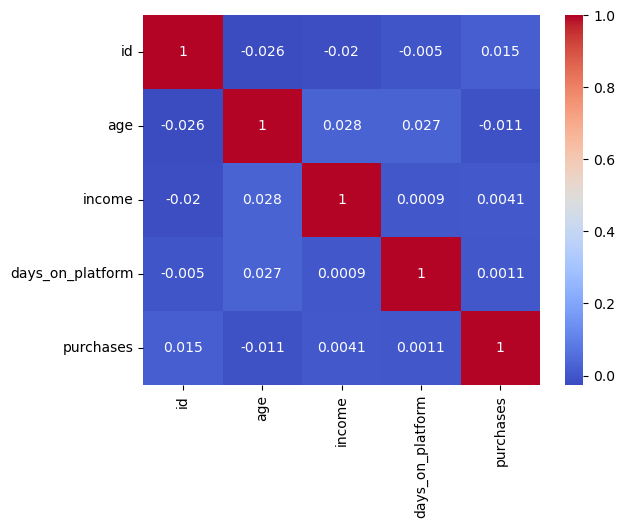

In [11]:
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

-If age has a correlation near 0 with income or purchases, it's not useful, we can drop it.

In [12]:
df.drop(columns=['age'],inplace=True)

<AxesSubplot:xlabel='days_on_platform', ylabel='Count'>

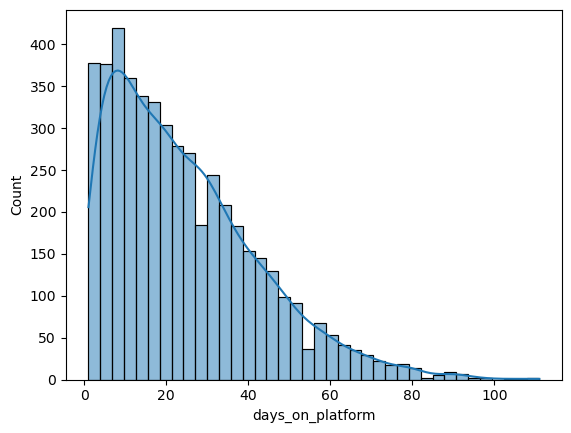

In [13]:
sns.histplot(df['days_on_platform'],kde=True)

In [14]:
df['days_on_platform'].fillna(df['days_on_platform'].median(),inplace=True)

In [15]:
df.isnull().sum()

id                  0
gender              0
income              0
days_on_platform    0
city                0
purchases           0
dtype: int64

### Duplicates

In [16]:
df.duplicated().sum()

0

- No duplicates

### Outliers

In [17]:
df.dtypes

id                    int64
gender               object
income                int64
days_on_platform    float64
city                 object
purchases             int64
dtype: object

C:\Users\PMLS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='id'>

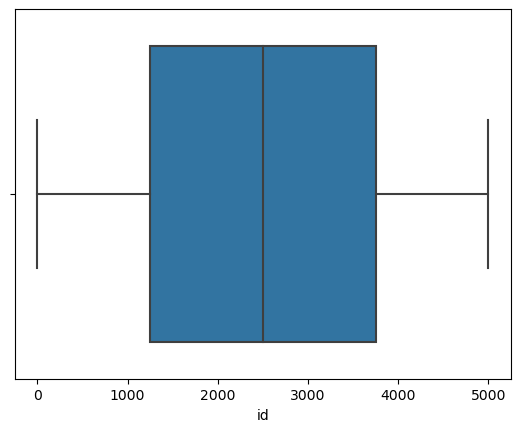

In [18]:
sns.boxplot(df['id'])

<AxesSubplot:xlabel='income', ylabel='Count'>

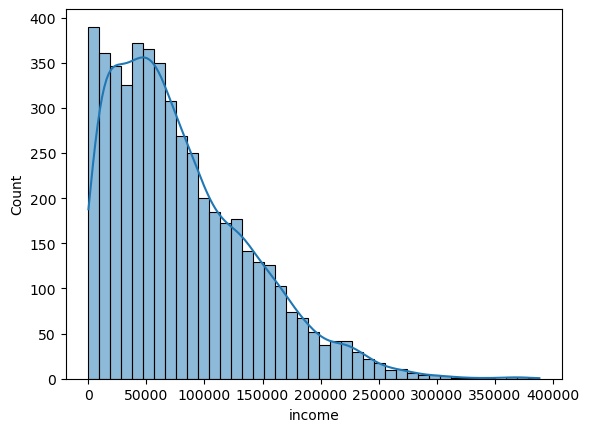

In [19]:
sns.histplot(df['income'],kde=True)

C:\Users\PMLS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='income'>

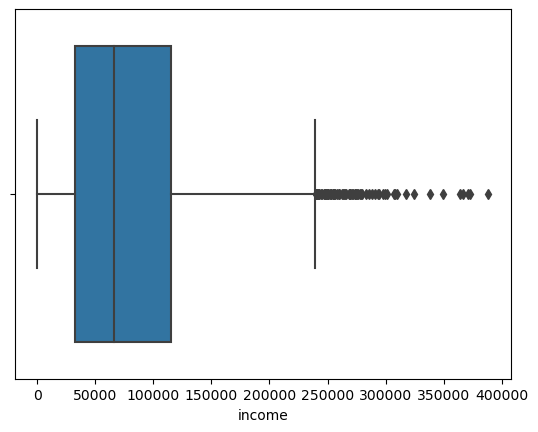

In [20]:
sns.boxplot(df['income'])

In [21]:
Q1 = df['income'].quantile(0.25)
Q3 = df['income'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['income'] < lower_bound) | (df['income'] > upper_bound)]
print(outliers)

        id  gender  income  days_on_platform           city  purchases
50      50    Male  255965              22.0          Tokyo          1
96      96    Male  279792              36.0         London          4
200    200  Female  309902              51.0          Tokyo          0
249    249  Female  265599              58.0         London          1
423    423  Female  263840              49.0         London          0
...    ...     ...     ...               ...            ...        ...
4198  4198  Female  273579              51.0  New York City          1
4383  4383    Male  308439              25.0  New York City          0
4723  4723    Male  264791              14.0  New York City          0
4778  4778    Male  282909              25.0          Miami          0
4859  4859  Female  299191              25.0          Miami          2

[77 rows x 6 columns]


- high-income individuals exist

C:\Users\PMLS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='days_on_platform'>

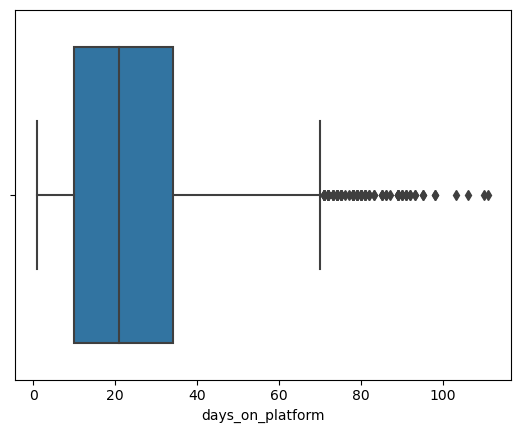

In [22]:
sns.boxplot(df['days_on_platform'])

In [23]:
Q1 = df['days_on_platform'].quantile(0.25)
Q3 = df['days_on_platform'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['days_on_platform'] < lower_bound) | (df['days_on_platform'] > upper_bound)]
print(outliers)

        id  gender  income  days_on_platform           city  purchases
43      43    Male   52145              79.0         London          0
60      60  Female  177953              71.0          Miami          0
134    134    Male  231131              78.0  New York City          2
177    177  Female   57929              74.0          Miami          0
198    198    Male  107407              78.0          Miami          2
...    ...     ...     ...               ...            ...        ...
4934  4934    Male  196741              72.0          Miami          2
4947  4947    Male   78264              92.0  San Francisco          0
4973  4973  Female   74952              73.0          Tokyo          1
4979  4979    Male   90750              71.0  New York City          1
4990  4990    Male    3020              89.0  New York City          0

[104 rows x 6 columns]


In [24]:
max_outlier = df[df['days_on_platform']>upper_bound]['days_on_platform'].max()
print(max_outlier)

111.0


In [25]:
print("Mean:", df['days_on_platform'].mean())
print("Median:", df['days_on_platform'].median())

Mean: 24.2944
Median: 21.0


#### Keeping it because:
- The majority of users have higher days_on_platform values.
- The difference between mean and median is not too large

C:\Users\PMLS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='purchases'>

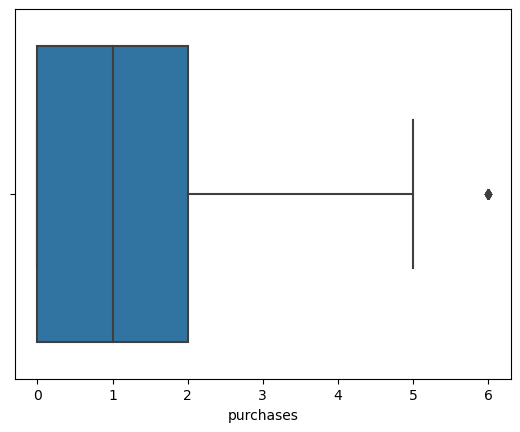

In [26]:
sns.boxplot(df['purchases'])

##### Relationship between income and purchases

<AxesSubplot:xlabel='income', ylabel='purchases'>

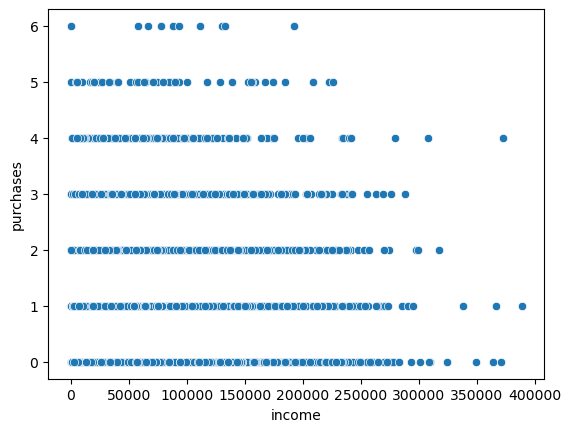

In [27]:
sns.scatterplot(x=df['income'],y=df['purchases'])

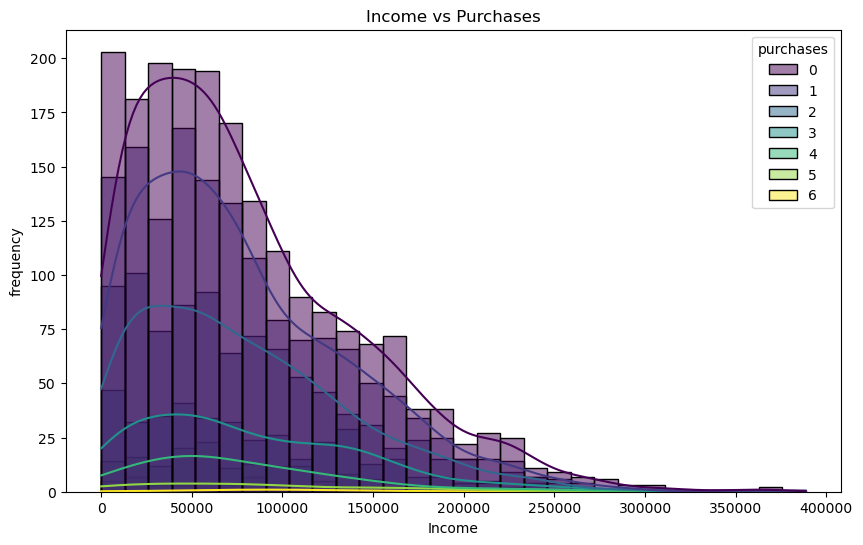

In [28]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='income',hue='purchases',bins=30,kde=True,palette='viridis')
plt.xlabel('Income')
plt.ylabel('frequency')
plt.title('Income vs Purchases')
plt.show()

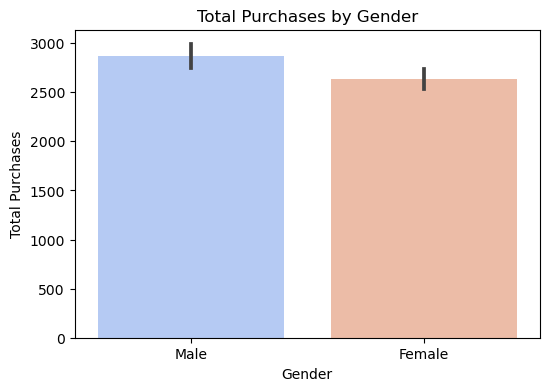

In [29]:
plt.figure(figsize=(6, 4))  
sns.barplot(x=df['gender'], y=df['purchases'], estimator=sum, palette="coolwarm")  
plt.xlabel("Gender")  
plt.ylabel("Total Purchases")  
plt.title("Total Purchases by Gender")  
plt.show()

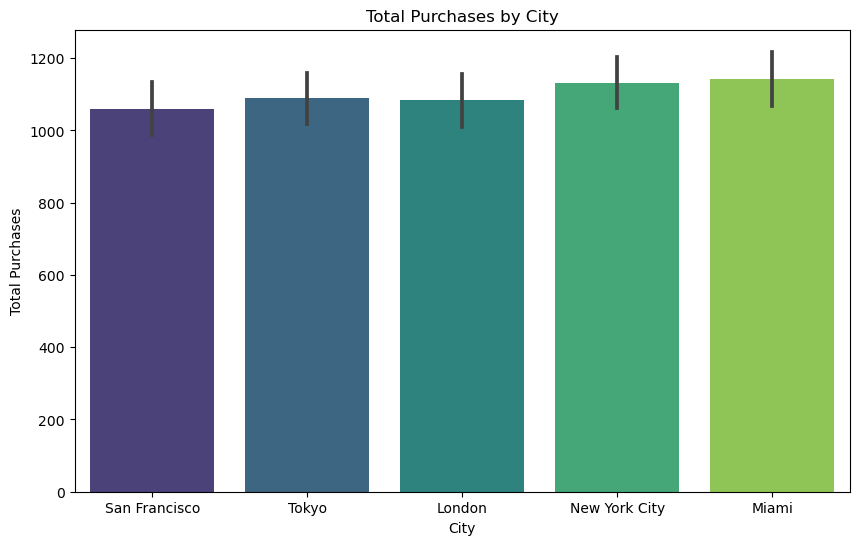

In [38]:
plt.figure(figsize=(10,6))
sns.barplot(x=df['city'],y=df['purchases'],estimator=sum,palette='viridis')
plt.xlabel('City')
plt.ylabel('Total Purchases')
plt.title('Total Purchases by City')
plt.xticks(rotation=0)
plt.show()